## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-1
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.7, 0.5, 0.3]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mm in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.2f" % (mm))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    # 使用 nesterov
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mm)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mm-%s-nesterov" % str(mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    # 不使用 nesterov
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mm)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mm-%s" % str(mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0829 14:32:40.694268  4596 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with MOMENTUM = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)     

W0829 14:32:40.830268  4596 deprecation.py:323] From D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.3097 - acc: 0.1037 - val_loss: 2.3033 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.3043 - acc: 0.1005 - val_loss: 2.3032 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.3045 - acc: 0.0981 - val_loss: 2.3048 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.3043 - acc: 0.0988 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.3039 - acc: 0.1007 - val_loss: 2.3037 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3042 - acc: 0.0998 - val_loss: 2.3043 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.3043 - acc: 0.0981 - val_loss: 2.3048 - v

50000/50000 [==============================] - 4s 89us/step - loss: 2.3047 - acc: 0.0991 - val_loss: 2.3043 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.3046 - acc: 0.1006 - val_loss: 2.3048 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.3046 - acc: 0.0980 - val_loss: 2.3041 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.3046 - acc: 0.0994 - val_loss: 2.3048 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.3047 - acc: 0.1013 - val_loss: 2.3043 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.3047 - acc: 0.0987 - val_loss: 2.3036 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3039 - acc: 0.0995 - val_loss: 2.3052 - val_acc: 0.1000
Epoch 16/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 95us/step - loss: 1.5385 - acc: 0.4477 - val_loss: 1.7564 - val_acc: 0.3808
Epoch 9/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5113 - acc: 0.4584 - val_loss: 1.6350 - val_acc: 0.4182
Epoch 10/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.4824 - acc: 0.4699 - val_loss: 1.6251 - val_acc: 0.4227
Epoch 11/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.4434 - acc: 0.4838 - val_loss: 1.7161 - val_acc: 0.4171
Epoch 12/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.4206 - acc: 0.4951 - val_loss: 1.5173 - val_acc: 0.4542
Epoch 13/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.3891 - acc: 0.5018 - val_loss: 1.6745 - val_acc: 0.4214
Epoch 14/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.3693 - acc: 0.5126 - val_loss: 1.5951 - val_acc: 0.4488
Epoch 15/50
50000/50000 [======================

50000/50000 [==============================] - 4s 88us/step - loss: 0.6177 - acc: 0.7800 - val_loss: 2.0037 - val_acc: 0.4821
Epoch 18/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.6147 - acc: 0.7804 - val_loss: 1.9374 - val_acc: 0.5051
Epoch 19/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.5901 - acc: 0.7896 - val_loss: 2.0222 - val_acc: 0.5035
Epoch 20/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.5852 - acc: 0.7918 - val_loss: 2.0948 - val_acc: 0.5069
Epoch 21/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.5870 - acc: 0.7910 - val_loss: 2.1030 - val_acc: 0.5071
Epoch 22/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.5748 - acc: 0.7983 - val_loss: 2.0810 - val_acc: 0.4905
Epoch 23/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.5698 - acc: 0.7970 - val_loss: 2.1769 - val_acc: 0.4857
Epoch 24/50
50000/50000 [=====================

Epoch 17/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.3180 - acc: 0.5267 - val_loss: 1.5460 - val_acc: 0.4434
Epoch 18/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2998 - acc: 0.5364 - val_loss: 1.4162 - val_acc: 0.5022
Epoch 19/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2681 - acc: 0.5467 - val_loss: 1.6506 - val_acc: 0.4442
Epoch 20/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2637 - acc: 0.5496 - val_loss: 1.5512 - val_acc: 0.4604
Epoch 21/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2397 - acc: 0.5581 - val_loss: 1.6585 - val_acc: 0.4179
Epoch 22/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2302 - acc: 0.5604 - val_loss: 1.7430 - val_acc: 0.4145
Epoch 23/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2022 - acc: 0.5683 - val_loss: 1.5979 - val_acc: 0.4452
Epoch 24/50
50000/50000 [=========

Epoch 26/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.4324 - acc: 0.8445 - val_loss: 2.4963 - val_acc: 0.4970
Epoch 27/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.4403 - acc: 0.8427 - val_loss: 2.3106 - val_acc: 0.4988
Epoch 28/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.4128 - acc: 0.8533 - val_loss: 2.5750 - val_acc: 0.4915
Epoch 29/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.4135 - acc: 0.8504 - val_loss: 2.4658 - val_acc: 0.4957
Epoch 30/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.4147 - acc: 0.8515 - val_loss: 2.5416 - val_acc: 0.4888
Epoch 31/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.4068 - acc: 0.8555 - val_loss: 2.3324 - val_acc: 0.5068
Epoch 32/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.3970 - acc: 0.8573 - val_loss: 2.4773 - val_acc: 0.5092
Epoch 33/50
50000/50000 [========

50000/50000 [==============================] - 5s 105us/step - loss: 1.1969 - acc: 0.5717 - val_loss: 1.6825 - val_acc: 0.4515
Epoch 26/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1802 - acc: 0.5782 - val_loss: 1.4708 - val_acc: 0.4814
Epoch 27/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1532 - acc: 0.5862 - val_loss: 1.7152 - val_acc: 0.4249
Epoch 28/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.1372 - acc: 0.5935 - val_loss: 1.4754 - val_acc: 0.4882
Epoch 29/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.1155 - acc: 0.5998 - val_loss: 1.9056 - val_acc: 0.4030
Epoch 30/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.1033 - acc: 0.6075 - val_loss: 1.7535 - val_acc: 0.4118
Epoch 31/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.0942 - acc: 0.6099 - val_loss: 1.5589 - val_acc: 0.4754
Epoch 32/50
50000/50000 [==================

50000/50000 [==============================] - 5s 93us/step - loss: 0.3819 - acc: 0.8650 - val_loss: 2.6720 - val_acc: 0.4633
Epoch 35/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.3679 - acc: 0.8698 - val_loss: 2.6323 - val_acc: 0.4952
Epoch 36/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.3719 - acc: 0.8686 - val_loss: 2.7925 - val_acc: 0.4844
Epoch 37/50
50000/50000 [==============================] - 5s 90us/step - loss: 0.3536 - acc: 0.8735 - val_loss: 2.9967 - val_acc: 0.4804
Epoch 38/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.3538 - acc: 0.8736 - val_loss: 2.7501 - val_acc: 0.4902
Epoch 39/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.3434 - acc: 0.8777 - val_loss: 2.9054 - val_acc: 0.4743
Epoch 40/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.3475 - acc: 0.8762 - val_loss: 3.1088 - val_acc: 0.4659
Epoch 41/50
50000/50000 [====================

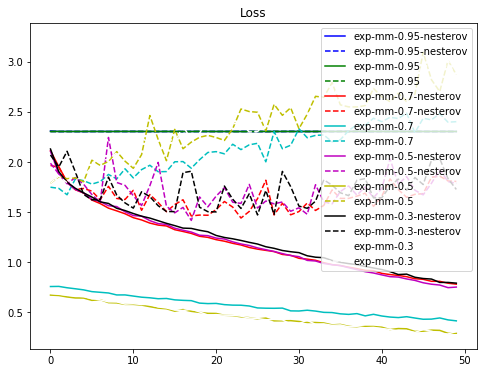

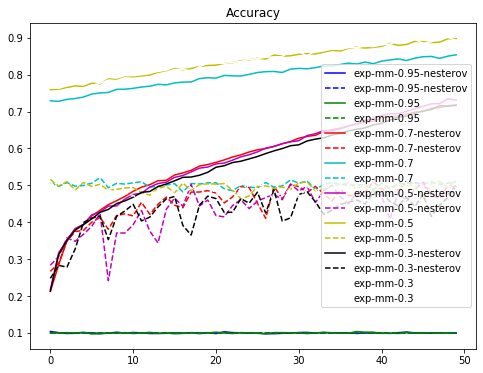

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()